# Logistic Regression - HR Employee Attrition Data

**Nikitia Ramruthan**

### Problem

In this analysis I use a Logistic Regression model to predict the likelihood of Employee Attrition (that is the departure of employees from the organization for any reason). 
Employee Attrition is based on a number of different features given in the dataset (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).
I use a tree based method to select for the significant features in the dataset. I then created a Logistic Regression model  (based on these key features) that predicts the likelihood of an employee leaving or staying at a company. 

Hence our `dependent variable (y)` is the Attrition (Yes/ No) or the rate at which employees (Leave/ Stay).


### Importing Libraries and Loading Dataset

In [1]:
import opendatasets as od
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from math import sqrt
# scientific number to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# set figure sizes
sns.set(rc={'figure.figsize':(8,6)})
import warnings
warnings.filterwarnings("ignore")

In [2]:
od.download("https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset")

Skipping, found downloaded files in ".\ibm-hr-analytics-attrition-dataset" (use force=True to force download)


In [3]:
df = pd.read_csv("ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

### Exploratory Data Analysis
#### Preparing the data

In [4]:
# extent of data
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# statistical summary of features
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Processing the data

In [6]:
# data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [8]:
# unique values in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

NOTE:

* The data is well structured and does not contain any null values.

* There are a number of different data types, we can use different types of data when using a logisitic regression model.

* There are no duplicated rows.

* 'EmployeeCount','StandardHours','Over18' have only one unique value in their respective columns. This data does not have any variance and will not be useful in prediction analysis.

* The 'EmployeeNumber' column refers to the unique ID of each employee, this feature will not have any effect on employee attrition.

For the reasons listed above, we can eliminate the `'EmployeeCount', 'Over18', 'StandardHours', and 'EmployeeNumber'` columns from the prediction analysis.

#### Data Cleaning 

In [9]:
new_df = df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1)

In [10]:
# unique values and their elements within each feature 

for column in new_df:
    unique_values = np.unique(new_df[column])
    nr_values = len(unique_values)
    if nr_values <= 5:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Age is: 43
The number of values for feature Attrition is: 2 -- ['No' 'Yes']
The number of values for feature BusinessTravel is: 3 -- ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
The number of values for feature DailyRate is: 886
The number of values for feature Department is: 3 -- ['Human Resources' 'Research & Development' 'Sales']
The number of values for feature DistanceFromHome is: 29
The number of values for feature Education is: 5 -- [1 2 3 4 5]
The number of values for feature EducationField is: 6
The number of values for feature EnvironmentSatisfaction is: 4 -- [1 2 3 4]
The number of values for feature Gender is: 2 -- ['Female' 'Male']
The number of values for feature HourlyRate is: 71
The number of values for feature JobInvolvement is: 4 -- [1 2 3 4]
The number of values for feature JobLevel is: 5 -- [1 2 3 4 5]
The number of values for feature JobRole is: 9
The number of values for feature JobSatisfaction is: 4 -- [1 2 3 4]
The number o

<AxesSubplot:xlabel='Attrition', ylabel='count'>

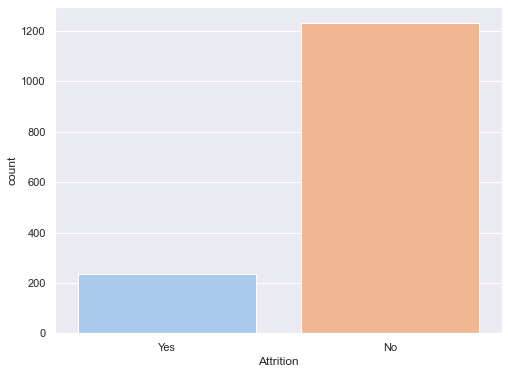

In [11]:
# investigating the distribution of y
sns.countplot(x = 'Attrition', data = new_df, palette = 'pastel')

In [12]:
# view all columns
new_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

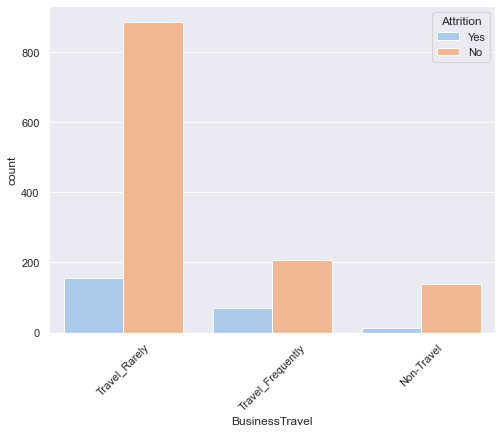

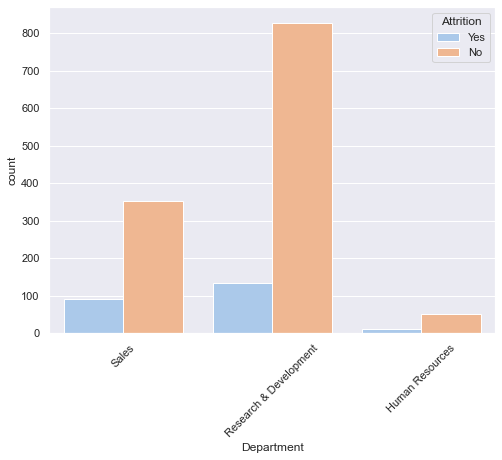

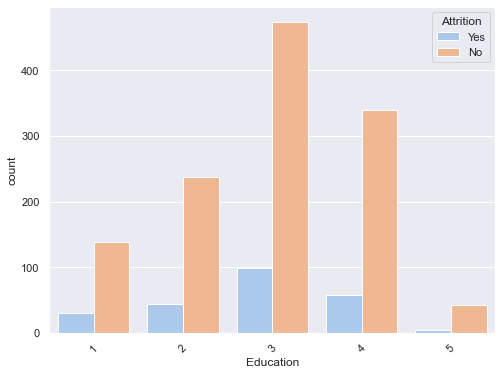

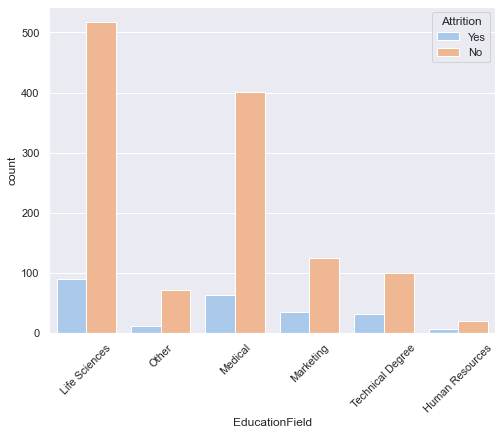

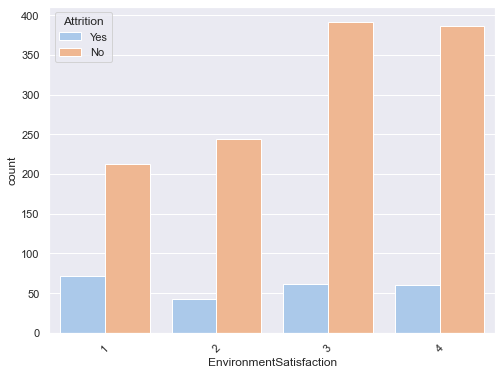

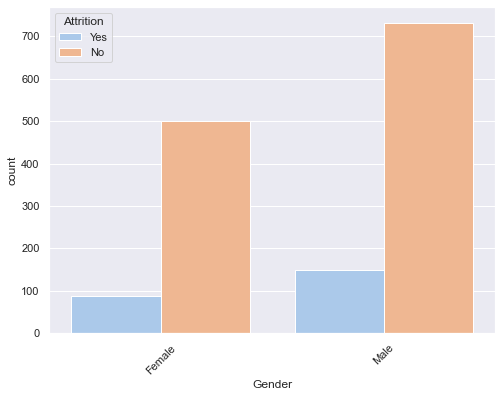

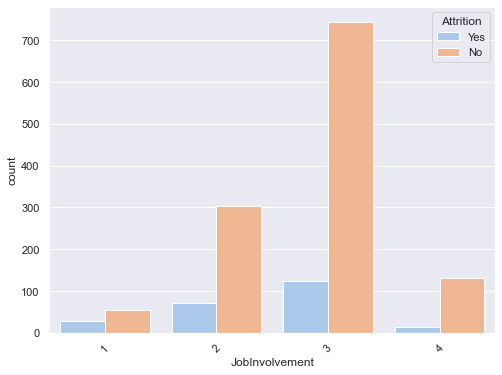

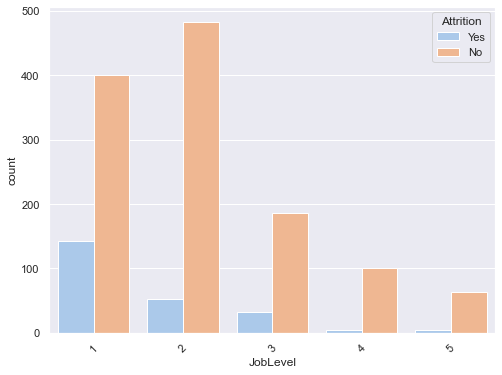

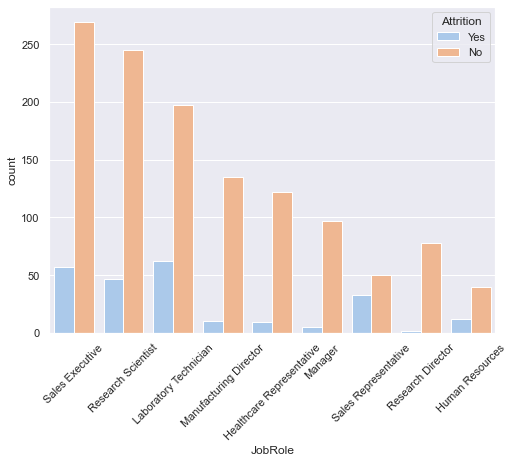

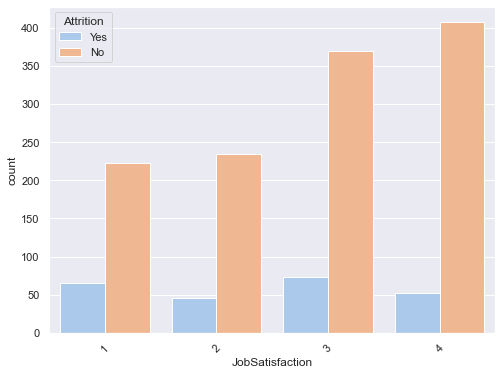

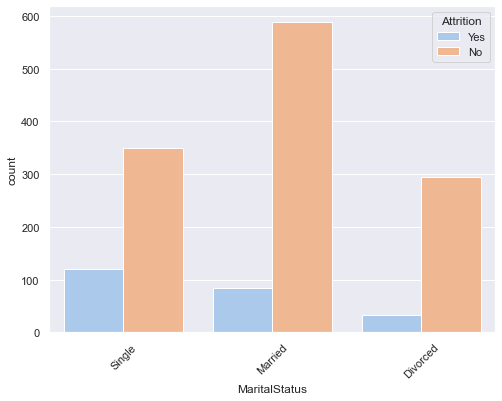

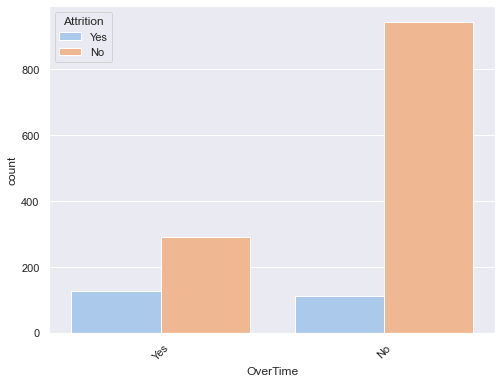

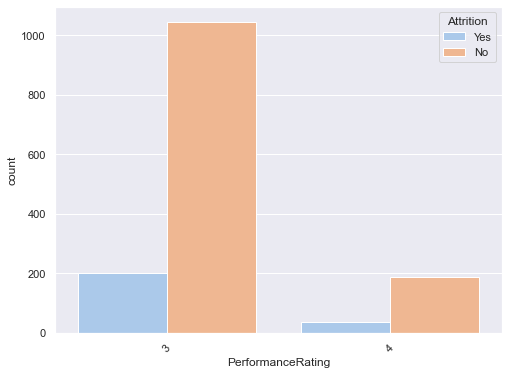

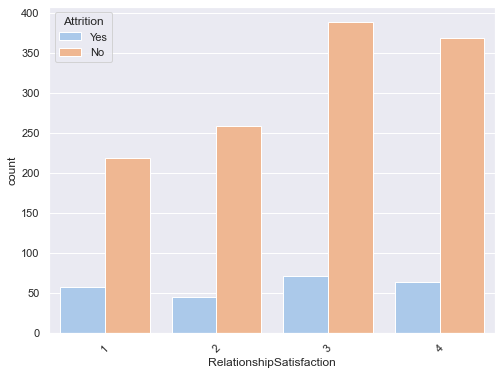

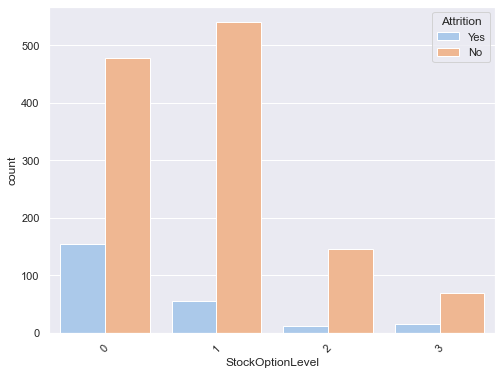

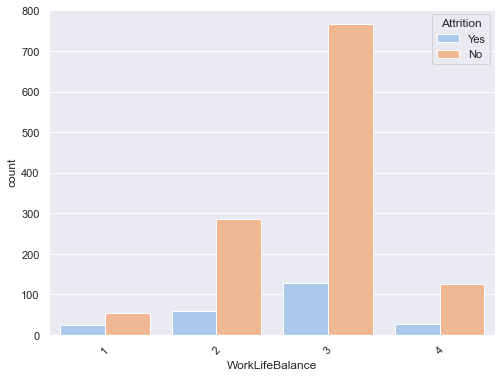

In [13]:
# select columns that are objects or have less than 5 elements (ie. categorical)
# plot categorical features to y variable

features = ['BusinessTravel', 'Department', 'Education','EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel','WorkLifeBalance']

for f in features:
    sns.countplot(x = f, data = new_df, hue = 'Attrition', palette = 'pastel')
    plt.xticks(rotation = 45)
    plt.show()

**Numerical Elements and their Categorical Equivelent**
* Education
1 = 'High School'
2 = 'Undergraduate'
3 = 'Graduate'
4 = 'Post Graduate'
5 = 'Doctrate'

* EnvironmentSatisfaction
1 = 'Poor'
2 = 'Average'
3 = 'Good'
4 = 'Excellent'

* JobInvolvement
1 = 'Poor'
2 = 'Average'
3 = 'Good'
4 = 'Excellent'

* JobSatisfaction
1 = 'Poor'
2 = 'Average'
3 = 'Good'
4 = 'Excellent'

* PerformanceRating
1 = 'Poor'
2 = 'Average'
3 = 'Good'
4 = 'Excellent'

* RelationshipSatisfaction
1 = 'Poor'
2 = 'Average'
3 = 'Good'
4 = 'Excellent'

* WorkLifeBalance
1 = 'Poor'
2 = 'Average'
3 = 'Good'
4 = 'Excellent'

In [14]:
# numerical labels to categorical elements 
label_encoder = LabelEncoder()
for column in features:
    new_df[column] = label_encoder.fit_transform(new_df[column])

In [15]:
print(df.shape)
print(new_df.shape)

(1470, 35)
(1470, 31)


In [16]:
# create 0 to 1 y variable
new_df['Attrition'][new_df['Attrition'] == 'Yes'] = 1
new_df['Attrition'][new_df['Attrition'] == 'No'] = 0

# Visualizing the data
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,39,0,2,613,1,6,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,27,0,2,155,1,4,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,49,0,1,1023,2,2,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


### Feature Selection

In [17]:
# split the data into X & y
X = new_df.drop('Attrition', axis = 1).values
y = new_df['Attrition']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1470, 30)
(1470,)


In [18]:
# run a tree-based estimator
dt = DecisionTreeClassifier(random_state=1, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [19]:
# run feature importance
fi_col = []
fi = []

for i,column in enumerate(new_df.drop('Attrition', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Age is : 0.06936000536497243
The feature importance for BusinessTravel is : 0.018326890534631303
The feature importance for DailyRate is : 0.05590051597448313
The feature importance for Department is : 0.004359775959394569
The feature importance for DistanceFromHome is : 0.08473092895171053
The feature importance for Education is : 0.0
The feature importance for EducationField is : 0.013375161980441794
The feature importance for EnvironmentSatisfaction is : 0.020036279935460644
The feature importance for Gender is : 0.007453057663889986
The feature importance for HourlyRate is : 0.024932602616695845
The feature importance for JobInvolvement is : 0.027300079893131664
The feature importance for JobLevel is : 0.0
The feature importance for JobRole is : 0.03825789835362165
The feature importance for JobSatisfaction is : 0.022896189310796386
The feature importance for MaritalStatus is : 0.03770262105118248
The feature importance for MonthlyIncome is : 0.1375336944

In [20]:
# creating a dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

# sorting the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
columns_to_keep = fi_df['Feature'][0:27]
fi_df.head(28)

,index,Feature,Feature Importance
0,15,MonthlyIncome,0.137534
1,4,DistanceFromHome,0.084731
2,18,OverTime,0.072939
3,0,Age,0.069360
4,2,DailyRate,0.055901
5,19,PercentSalaryHike,0.054607
6,23,TotalWorkingYears,0.052540
7,17,NumCompaniesWorked,0.050101
8,21,RelationshipSatisfaction,0.041946
9,12,JobRole,0.038258


### Logistic Regression Model

In [21]:
print(df.shape)
print(new_df[columns_to_keep].shape)

(1470, 35)
(1470, 27)


In [22]:
new_df[columns_to_keep].head()

,MonthlyIncome,DistanceFromHome,OverTime,Age,DailyRate,PercentSalaryHike,TotalWorkingYears,NumCompaniesWorked,RelationshipSatisfaction,JobRole,...,JobSatisfaction,YearsAtCompany,EnvironmentSatisfaction,BusinessTravel,WorkLifeBalance,StockOptionLevel,EducationField,Gender,Department,PerformanceRating
0,5993,1,1,41,1102,11,8,8,0,7,...,3,6,1,2,0,0,1,0,2,0
1,5130,8,0,49,279,23,10,1,3,6,...,1,10,2,1,2,1,1,1,1,1
2,2090,2,1,37,1373,15,7,6,1,2,...,2,0,3,2,2,0,4,1,1,0
3,2909,3,1,33,1392,11,8,1,2,6,...,2,8,3,1,2,0,1,0,1,0
4,3468,2,0,27,591,12,6,9,3,2,...,1,2,0,2,2,1,3,1,1,0


In [23]:
# split the data into X and y
X = new_df[columns_to_keep].values
y = new_df['Attrition']
y = y.astype(int)

print(X.shape)
print(y.shape)

(1470, 27)
(1470,)


In [24]:
# perform 80/20 data split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=1)

#data dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 27)
(294, 27)
(1176,)
(294,)


In [25]:
# standardize features
# scale based on standard normal distribution

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# define Logistic Regression model
model = LogisticRegression(random_state=1, solver = 'lbfgs')

# build training model
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [27]:
# predict class labels for samples in X
model.predict(X_train)
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# predicted_probability - Probability estimates
pred_proba = model.predict_proba(X_train)
pred_proba

array([[0.869115, 0.130885],
       [0.711927, 0.288073],
       [0.867739, 0.132261],
       ...,
       [0.968465, 0.031535],
       [0.980022, 0.019978],
       [0.858291, 0.141709]])

In [29]:
# coef_ - coefficient of the features in the decision function
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
# score - returns the mean accuracy on the given test data and labels - below

Coefficients: [[-0.470672 0.344965 0.741744 -0.304765 -0.192069 -0.109651 -0.294302
  0.326779 -0.135246 -0.152954 0.281416 0.506945 -0.662971 -0.313604
  0.045184 0.001429 -0.146313 -0.304644 0.240003 -0.377086 0.010917
  -0.312585 -0.299903 0.040625 0.171147 0.427025 -0.003715]]
Intercept: [-2.439448]


### Model Evaluation and Performance

In [30]:
# accuracy on train
print("The Training Accuracy is: ", model.score(X_train, y_train)*100,'%')

# accuracy on test
print("The Testing Accuracy is: ", model.score(X_test, y_test)*100,'%')

# classification report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  87.75510204081633 %
The Testing Accuracy is:  85.03401360544217 %
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       997
           1       0.72      0.32      0.45       179

    accuracy                           0.88      1176
   macro avg       0.80      0.65      0.69      1176
weighted avg       0.86      0.88      0.86      1176



In [31]:
# confusion matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

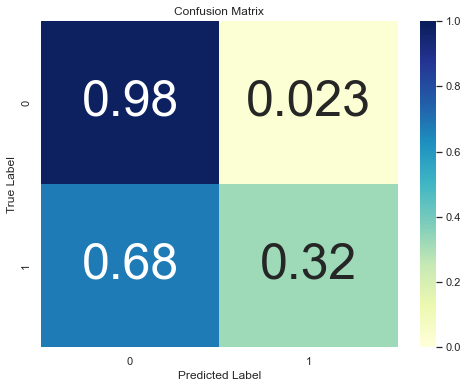

In [32]:
# visualizing cm
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion Matrix')

### Conclusion 

The Logistic Regression model can predict if an employee will leave or stay in their current job with 85% accuracy. There are 27 features that affect Employee Attrition in a significant manner. Even though the model is relatively accurate there is still room for improvement by further exploring these features.


### Additional Information

In [33]:
model.classes_

array([0, 1])

In [34]:
cm.sum(axis=1)
cm_norm

array([[0.976931, 0.023069],
       [0.675978, 0.324022]])

In [35]:
cm

array([[974,  23],
       [121,  58]], dtype=int64)

In [36]:
cm.sum(axis=0)

array([1095,   81], dtype=int64)

In [37]:
np.diag(cm)

array([974,  58], dtype=int64)

In [38]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)
# ie. % of the people that left were correctly identified by logreg model 

# Specificity, true negative rate or miss rate
TNR = TN / (TN + FP)
print("The True Negative Rate is: ", TNR)
# # ie. % of the people that stayed were correctly identified by logreg model

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or false alarm rate
FPR = FP / (FP + TN)
print("The False Positive Rate is:", FPR)

# False negative rate or miss rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average True Positive Rate is:", TPR.sum()/2)
print("The average True Negative Rate is:", TNR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False Positive Rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.976931 0.324022]
The True Negative Rate is:  [0.324022 0.976931]
The Precision is: [0.889498 0.716049]
The False Positive Rate is: [0.675978 0.023069]
The False Negative Rate is:  [0.023069 0.675978]

The average True Positive Rate is: 0.6504765693729233
The average True Negative Rate is: 0.6504765693729233
The average Precision is: 0.8027735498055133
The average False Positive Rate is: 0.34952343062707675
The average False Negative Rate is: 0.34952343062707675
